## Hydrogen Torch - Image Instance Segmentation 予測結果ファイ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!ls pred/preds_instance-Car.fold0.predict.1_fold0

test_predictions.csv     test_raw_predictions.pkl


## csvファイル

In [3]:
df = pd.read_csv('pred/preds_instance-Car.fold0.predict.1_fold0/test_predictions.csv')
df.shape

(19, 4)

In [4]:
df

,image_id,class_id,instance_rle,confidence
0,000000000419.jpg,NaN,NaN,NaN
1,000000000656.jpg,car,9520 12 9988 17 10456 22 10925 26 11394 30 118...,0.842303
2,000000000656.jpg,car,227098 4 227568 7 228039 8 228510 10 228975 1 ...,0.845696
3,000000000656.jpg,car,237450 1 237921 2 238392 3 238863 5 239333 7 2...,0.522743
4,000000001144.jpg,car,123001 9 123480 11 123959 14 124438 17 124918 ...,0.657597
5,000000001518.jpg,car,284351 5 284828 10 285307 12 285785 15 286264 ...,0.669551
6,000000001518.jpg,car,206127 9 206600 18 207079 20 207558 22 208038 ...,0.685181
7,000000001518.jpg,car,37214 6 37692 9 38171 11 38650 13 39130 14 396...,0.804191
8,000000001586.jpg,car,205867 1 206290 7 206714 10 207139 12 207563 1...,0.873504
9,000000001955.jpg,car,191682 4 192320 8 192959 10 193598 11 194237 1...,0.700778


In [5]:
df['image_id'].value_counts()

000000002459.jpg    4
000000000656.jpg    3
000000001518.jpg    3
000000002309.jpg    3
000000000419.jpg    1
000000001144.jpg    1
000000001586.jpg    1
000000001955.jpg    1
000000002089.jpg    1
000000003272.jpg    1
Name: image_id, dtype: int64

## pickleファイル

In [6]:
dic = pd.read_pickle('pred/preds_instance-Car.fold0.predict.1_fold0/test_raw_predictions.pkl')
type(dic)

dict

In [7]:
dic.keys()

dict_keys(['confidences', 'raw_probabilities', 'instance_predictions', 'class_names', 'image_id'])

- image_id: 画像ファイル名
- instance_predictions: マスク情報。インスタンスに1から順に番号が振られる
- confidences: 各インスタンスのConfidence?
- class_names: ?
- raw_probabilities: ?

In [8]:
dic['image_id']

array(['000000000419.jpg', '000000000656.jpg', '000000001144.jpg',
       '000000001518.jpg', '000000001586.jpg', '000000001955.jpg',
       '000000002089.jpg', '000000002309.jpg', '000000002459.jpg',
       '000000003272.jpg'], dtype=object)

In [9]:
!ls coco_image_instance_segmentation_SAMPLE

images   train.pq


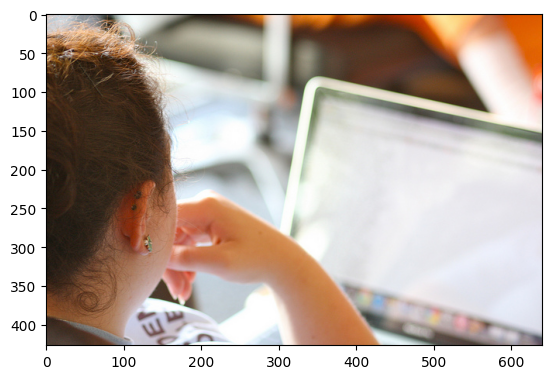

In [10]:
img_path = 'coco_image_instance_segmentation_SAMPLE/images/000000002459.jpg'
image = mpimg.imread(img_path)
plt.imshow(image)
plt.show()

In [50]:
# マスク情報（car1=1, car2=2, car3=3, ..）
len(dic['instance_predictions'])

10

In [25]:
dic['instance_predictions'][8].shape

(427, 640, 1)

In [33]:
dic['instance_predictions'][8].mean(), dic['instance_predictions'][8].min(), dic['instance_predictions'][8].max()
# 000000002459.jpgは4つ予測

(0.17295814, 0.0, 4.0)

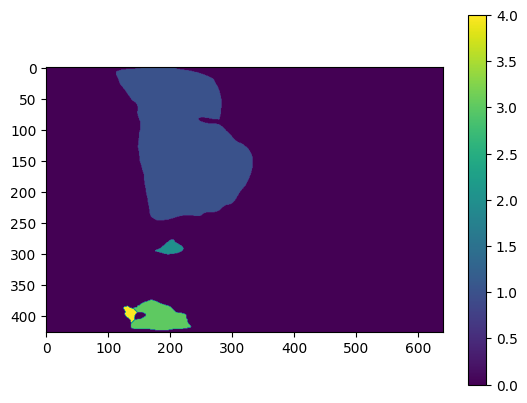

In [54]:
plt.imshow(dic['instance_predictions'][8], cmap='viridis')
plt.colorbar()
plt.show()

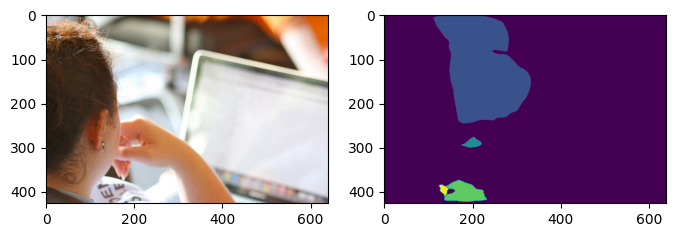

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

img_path = 'coco_image_instance_segmentation_SAMPLE/images/000000002459.jpg'
image = mpimg.imread(img_path)
axes[0].imshow(image)

axes[1].imshow(dic['instance_predictions'][8], cmap='viridis')

In [31]:
dic['instance_predictions'][0].mean(), dic['instance_predictions'][0].min(), dic['instance_predictions'][0].max()
# 000000000419.jpgには何も予測されてないので

(0.0, 0.0, 0.0)

In [32]:
dic['instance_predictions'][1].mean(), dic['instance_predictions'][1].min(), dic['instance_predictions'][1].max()
# 000000000656.jpgは3つ予測

(0.21283767, 0.0, 3.0)

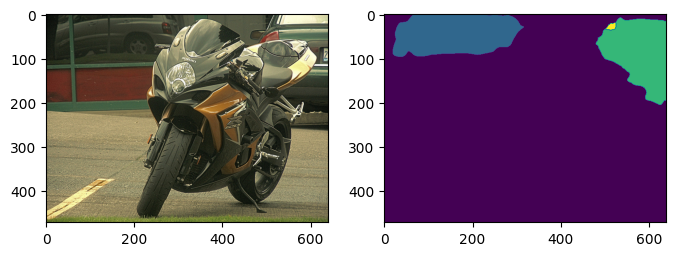

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

img_path = 'coco_image_instance_segmentation_SAMPLE/images/000000000656.jpg'
image = mpimg.imread(img_path)
axes[0].imshow(image)

axes[1].imshow(dic['instance_predictions'][1], cmap='viridis')

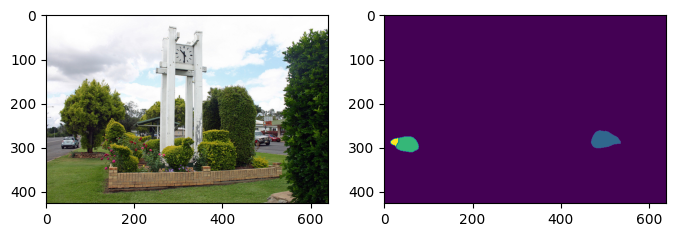

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

img_path = 'coco_image_instance_segmentation_SAMPLE/images/000000002309.jpg'
image = mpimg.imread(img_path)
axes[0].imshow(image)

axes[1].imshow(dic['instance_predictions'][7], cmap='viridis')

In [13]:
# ?
dic['class_names']

['car', 1, 2]

In [16]:
# 各画像のCar InstanceのConfidence
dic['confidences']

[defaultdict(dict, {}),
 defaultdict(dict,
             {'car': {1: 0.8423029918716021,
               2: 0.84569619140625,
               3: 0.5227427368164063}}),
 defaultdict(dict, {'car': {1: 0.6575965108705252}}),
 defaultdict(dict,
             {'car': {1: 0.6695507562648483,
               2: 0.685180530286815,
               3: 0.8041908435364006}}),
 defaultdict(dict, {'car': {1: 0.8735039561701278}}),
 defaultdict(dict, {'car': {1: 0.7007779284157599}}),
 defaultdict(dict, {'car': {1: 0.4705937897582697}}),
 defaultdict(dict,
             {'car': {1: 0.5956280048076923,
               2: 0.6521698349834519,
               3: 0.45990128643744815}}),
 defaultdict(dict,
             {'car': {1: 0.8980451574346797,
               2: 0.5220011524699616,
               3: 0.6163653519037124,
               4: 0.3682842912345097}}),
 defaultdict(dict, {})]

In [17]:
dic['confidences'][8]

defaultdict(dict,
            {'car': {1: 0.8980451574346797,
              2: 0.5220011524699616,
              3: 0.6163653519037124,
              4: 0.3682842912345097}})

In [21]:
# ?
dic['raw_probabilities'].shape

(10, 3, 256, 256)

In [25]:
dic['raw_probabilities'].mean(), dic['raw_probabilities'].min(), dic['raw_probabilities'].max()

(0.015756063, 5.7753946e-06, 0.9969683)

In [19]:
dic['raw_probabilities'][8][0]

array([[1.60267707e-02, 4.18435363e-03, 1.28899305e-03, ...,
        6.56415650e-04, 1.08769361e-03, 8.93325079e-03],
       [2.51616002e-03, 7.48343824e-04, 2.83609581e-04, ...,
        2.07779260e-04, 2.44155759e-04, 3.18733836e-03],
       [2.22572172e-03, 5.44950075e-04, 2.47477670e-04, ...,
        2.71372381e-04, 2.81250250e-04, 4.44530183e-03],
       ...,
       [1.63167866e-03, 2.02035983e-04, 1.26448052e-04, ...,
        6.98954900e-05, 1.10914305e-04, 3.86156398e-03],
       [1.67153380e-03, 2.33255909e-04, 1.10117602e-04, ...,
        1.25395134e-04, 2.26313074e-04, 7.79451476e-03],
       [1.56849921e-02, 3.64753231e-03, 2.49148184e-03, ...,
        2.79987231e-03, 4.94764792e-03, 5.03309406e-02]], dtype=float32)

In [30]:
dic['raw_probabilities'][8].mean(), dic['raw_probabilities'][8].min(), dic['raw_probabilities'][8].max()

(0.048645344, 1.50230435e-05, 0.9969683)

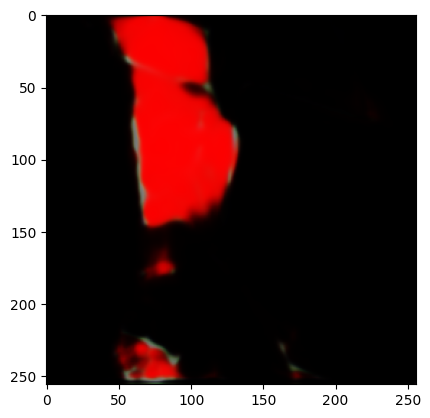

In [33]:
image = np.transpose(dic['raw_probabilities'][8], (1, 2, 0))

plt.imshow(image)
plt.show()